### Import Necessary Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [10]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(f"Original Dataset")
df.head()

Original Dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
unique_values = df['target'].unique()
print("Unique values in target:", unique_values)

total_unique = df['target'].nunique()
print("Total number of unique values in target:", total_unique)


Unique values in target: [0 1]
Total number of unique values in target: 2


### Preprocess the dataset

In [9]:
# Separate features and target
features = df.drop('target', axis=1)
target = df['target']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['target'] = target

print("Scaled Dataset:")
df_scaled.head()

Scaled Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


### Train Test splilt

In [11]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


### Binary Logistics Regression

In [12]:
# Create logistic regression model
bin_logreg = LogisticRegression()

# Fit on training data
bin_logreg.fit(X_train, y_train)

# Predict on test data
y_pred = bin_logreg.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
# Train logistic regression models with different C values
from sklearn.linear_model import LogisticRegression

# strong regularization
logreg001 = LogisticRegression(C=0.001, max_iter=10000).fit(X_train, y_train)

# default c=1
logreg1   = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)

# weak regularization
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)


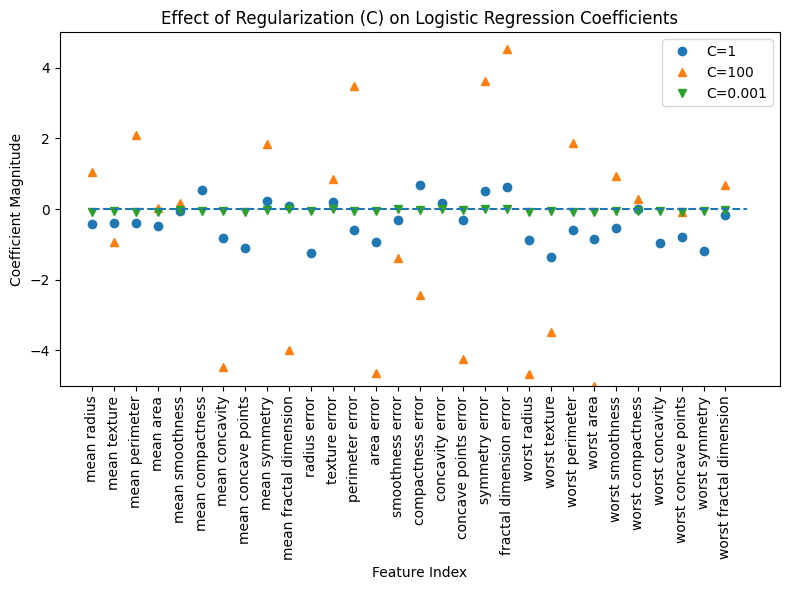

In [19]:
plt.figure(figsize=(8, 6))

plt.plot(logreg1.coef_.T,     'o', label="C=1")
plt.plot(logreg100.coef_.T,   '^', label="C=100")
plt.plot(logreg001.coef_.T,   'v', label="C=0.001")

plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.hlines(0, 0, X_train.shape[1], linestyles='dashed')
plt.ylim(-5, 5)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Effect of Regularization (C) on Logistic Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

### Multimodal Logistic Regression

In [23]:
# Create 3 classes(small, medium and large tumor) from target using mean area feature
df_multi = df_scaled.copy()
df_multi['target_multi'] = pd.qcut(df['mean area'], q=3, labels=[0, 1, 2])
df_multi.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_multi
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,2
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,2
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,2
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,2


In [26]:

X_multi = df_multi.drop(['target', 'target_multi'], axis=1)
y_multi = df_multi['target_multi']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LogisticRegression(multi_class='multinomial', max_iter=10000)
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)

print("Multinomial Logistic Regression:")
print(classification_report(y_test_m, y_pred_multi))


Multinomial Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.89      0.89      0.89        36
           2       1.00      0.92      0.96        39

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



c:\Users\HCI_Lab_PC_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Accuracy Comparision

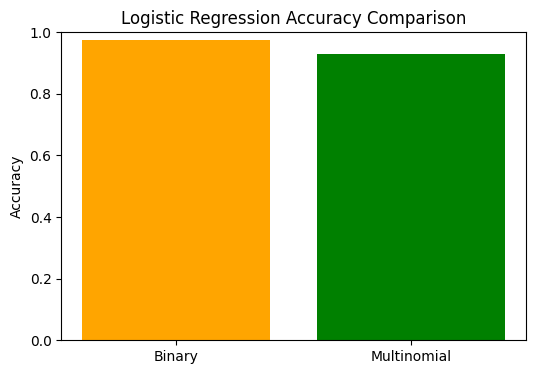

In [29]:
from sklearn.metrics import accuracy_score

acc_bin = accuracy_score(y_test, y_pred)
acc_multi = accuracy_score(y_test_m, y_pred_multi)

plt.figure(figsize=(6, 4))
plt.bar(['Binary', 'Multinomial'], [acc_bin, acc_multi], color=['orange', 'green'])
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


### Confusion matrix

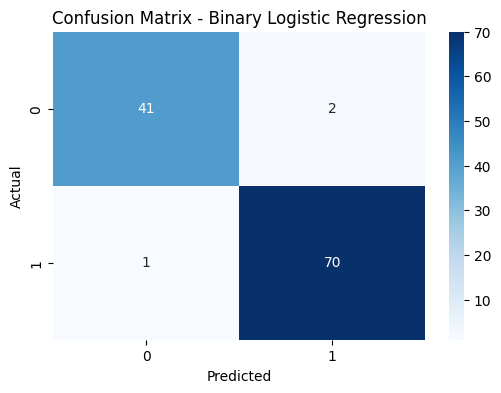

In [31]:
#confusion matrix for binary classification
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Binary Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


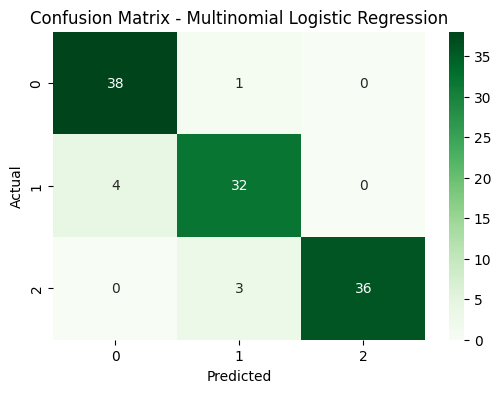

In [32]:
# confusion matrix for multi-class classification
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_m, y_pred_multi), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
